# MBAR 


In [3]:
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
from glob import glob
from sklearn.utils import resample

In [4]:
import pymbar
from pymbar.mbar_pmf import mbar_pmf

In [5]:
pwd

'/Users/van/github/CodingNotes/notebooks/02-simulation/analysis'

In [6]:
# from glob import glob
n_windows = 42
val_min = -1.90
val_max = 2.20
fc = 300.0
nbins = n_windows - 1

In [7]:
val_kn = []
for i in range(n_windows):
    fnames = sorted(glob('../test/mbar/%02d/step6.0?_equilibration.cv' % i))
    arrays = [np.loadtxt(f, usecols=1)[::] for f in fnames[:]]
    val_kn.append(np.concatenate(arrays))
val0_k = np.linspace(val_min, val_max, n_windows)
K_k = np.ones(n_windows) * fc

In [8]:
for i in range(n_windows):
    print("Window %02d:" % i, pymbar.timeseries.subsampleCorrelatedData(val_kn[i], conservative=True))

Window 00: range(0, 4320, 2)
Window 01: range(0, 4320, 2)
Window 02: range(0, 4320, 2)
Window 03: range(0, 4320, 2)
Window 04: range(0, 4320, 2)
Window 05: range(0, 4320, 2)
Window 06: range(0, 4320, 2)
Window 07: range(0, 4320, 2)
Window 08: range(0, 4320, 2)
Window 09: range(0, 4320, 2)
Window 10: range(0, 4320, 2)
Window 11: range(0, 4320)
Window 12: range(0, 4320, 2)
Window 13: range(0, 4320, 2)
Window 14: range(0, 4320, 2)
Window 15: range(0, 4320, 2)
Window 16: range(0, 4320, 2)
Window 17: range(0, 4320, 3)
Window 18: range(0, 4320, 3)
Window 19: range(0, 4320, 3)
Window 20: range(0, 4320, 4)
Window 21: range(0, 4320, 3)
Window 22: range(0, 4320, 3)
Window 23: range(0, 4320, 3)
Window 24: range(0, 4320, 3)
Window 25: range(0, 4320, 3)
Window 26: range(0, 4320, 3)
Window 27: range(0, 4320, 3)
Window 28: range(0, 4320, 2)
Window 29: range(0, 4320, 2)
Window 30: range(0, 4320, 2)
Window 31: range(0, 4320, 2)
Window 32: range(0, 4320, 2)
Window 33: range(0, 4320, 2)
Window 34: range(

In [9]:
# mbar = mbar_pmf(val_kn, val0_k, K_k, 300.0, u_kn=np.array(ene_pm3))
mbar = mbar_pmf(val_kn, val0_k, K_k, fc)

K (total states) = 42, total samples = 181440
N_k = 
[4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320
 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320
 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320 4320]
There are 42 states with samples.
Initial dimensionless free energies with method BAR
f_k = 
[ 0.          0.17604966  0.62509638  1.33214313  2.45107979  3.7088232
  4.84781657  6.14082562  7.87828969 10.06376706 12.07115782 14.21851511
 16.67507912 19.29176847 21.93298361 24.80495648 27.96446873 30.81203376
 33.30525296 35.74203202 38.1602146  39.2263641  38.90515719 38.40380405
 37.45848472 36.12841996 34.67775712 32.66850312 30.51373847 28.48324234
 26.83562856 26.01533937 25.30587587 24.26956539 23.42441905 22.5752032
 21.87260903 21.66446369 21.47609735 21.91496687 22.35663474 22.35809535]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 

In [10]:
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins)
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, uncertainties='from-specified', pmf_reference=f_i[:20].argmin())
np.savetxt("freefile_mbar", np.column_stack((bin_centers, f_i, df_i)))

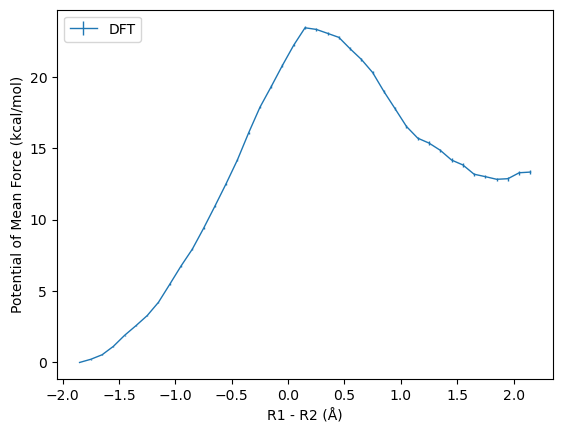

23.4 0.1


In [11]:
initial = np.loadtxt("freefile_mbar")
plt.xlabel("R1 - R2 (Å)")
plt.ylabel("Potential of Mean Force (kcal/mol)")

plt.errorbar(initial[:,0], initial[:,1] - initial[:10,1].min(), yerr=initial[:,2], linewidth=1, label="DFT")

plt.legend(loc=2)
plt.savefig("pmf.png", dpi=300)
plt.show()

print(round(initial[:,1].max() - initial[:10,1].min(),1), round(initial[initial[:,1].argmax()][2],1))
